In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

In [3]:
df = pd.read_csv('SS-Compositions.csv')

In [4]:
df.sample(8)

,Steel,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten,Type
14,321,0.08,2.00,1.00,18.00,10.50,0.00,0.045,0.1,0.03,0.0,0.0,0.4,0.0,0.0,0.0,A
50,434,0.12,1.00,1.00,17.00,0.00,1.00,0.040,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,F
48,404,0.05,1.00,0.50,11.88,1.63,0.00,0.030,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,F
36,AM-355,0.13,0.88,0.50,15.50,4.50,2.88,0.040,0.1,0.03,0.0,0.0,0.0,0.0,0.0,0.0,P
2,301,0.15,2.00,1.00,17.00,7.00,0.00,0.045,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,A
10,310,0.25,2.00,1.50,25.00,20.50,0.00,0.045,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,A
60,501B,0.15,0.45,0.75,9.00,0.00,1.00,0.030,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,M
23,416,0.15,1.25,1.00,13.00,0.00,0.60,0.060,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,M


In [5]:
df.shape

(62, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Steel       62 non-null     object 
 1   Carbon      62 non-null     float64
 2   Manganese   62 non-null     float64
 3   Silicon     62 non-null     float64
 4   Chromium    62 non-null     float64
 5   Nickel      62 non-null     float64
 6   Molybdenum  62 non-null     float64
 7   Phosphorus  62 non-null     float64
 8   Nitrogen    62 non-null     float64
 9   Sulphur     62 non-null     float64
 10  Niobium     62 non-null     float64
 11  Aluminium   62 non-null     float64
 12  Titanium    62 non-null     float64
 13  Copper      62 non-null     float64
 14  Vanadium    62 non-null     float64
 15  Tungsten    62 non-null     float64
 16  Type        62 non-null     object 
dtypes: float64(15), object(2)
memory usage: 8.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carbon,62.0,0.156339,0.173878,0.030,0.08,0.12,0.1500,1.08
Manganese,62.0,1.838871,2.261588,0.100,1.00,1.00,2.0000,14.75
Silicon,62.0,0.939194,0.369928,0.000,1.00,1.00,1.0000,2.50
Chromium,62.0,16.379194,4.677556,5.000,13.00,17.00,18.0000,30.00
Nickel,62.0,6.080968,7.549874,0.000,0.00,4.50,9.1875,35.50
Molybdenum,62.0,0.514355,0.870893,0.000,0.00,0.00,0.7500,3.50
Phosphorus,62.0,0.048387,0.036862,0.010,0.04,0.04,0.0450,0.28
Nitrogen,62.0,0.032823,0.085510,0.000,0.00,0.00,0.0000,0.38
Sulphur,62.0,0.040290,0.042555,0.008,0.03,0.03,0.0300,0.30
Niobium,62.0,0.031290,0.111832,0.000,0.00,0.00,0.0000,0.60


In [8]:
df.Type.value_counts()

A    25
M    17
F    11
P     9
Name: Type, dtype: int64

In [9]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column Steel has 62 unique values
Column Carbon has 18 unique values
Column Manganese has 14 unique values
Column Silicon has 10 unique values
Column Chromium has 31 unique values
Column Nickel has 30 unique values
Column Molybdenum has 15 unique values
Column Phosphorus has 8 unique values
Column Nitrogen has 7 unique values
Column Sulphur has 7 unique values
Column Niobium has 4 unique values
Column Aluminium has 4 unique values
Column Titanium has 4 unique values
Column Copper has 6 unique values
Column Vanadium has 2 unique values
Column Tungsten has 3 unique values
Column Type has 4 unique values


In [10]:
df.Type.value_counts()

A    25
M    17
F    11
P     9
Name: Type, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Steel       62 non-null     object 
 1   Carbon      62 non-null     float64
 2   Manganese   62 non-null     float64
 3   Silicon     62 non-null     float64
 4   Chromium    62 non-null     float64
 5   Nickel      62 non-null     float64
 6   Molybdenum  62 non-null     float64
 7   Phosphorus  62 non-null     float64
 8   Nitrogen    62 non-null     float64
 9   Sulphur     62 non-null     float64
 10  Niobium     62 non-null     float64
 11  Aluminium   62 non-null     float64
 12  Titanium    62 non-null     float64
 13  Copper      62 non-null     float64
 14  Vanadium    62 non-null     float64
 15  Tungsten    62 non-null     float64
 16  Type        62 non-null     object 
dtypes: float64(15), object(2)
memory usage: 8.4+ KB


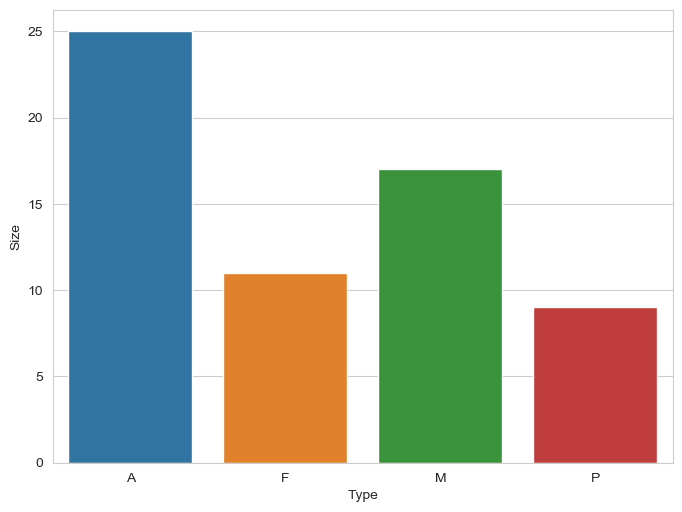

In [12]:
class_tree = df.groupby('Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label);

In [13]:
for i, number in enumerate(class_tree):
    percent = (number/class_tree.sum())
    print('Stainless Steel Type', class_tree.index[i])
    print('%.2f'% percent)

Stainless Steel Type A
0.40
Stainless Steel Type F
0.18
Stainless Steel Type M
0.27
Stainless Steel Type P
0.15


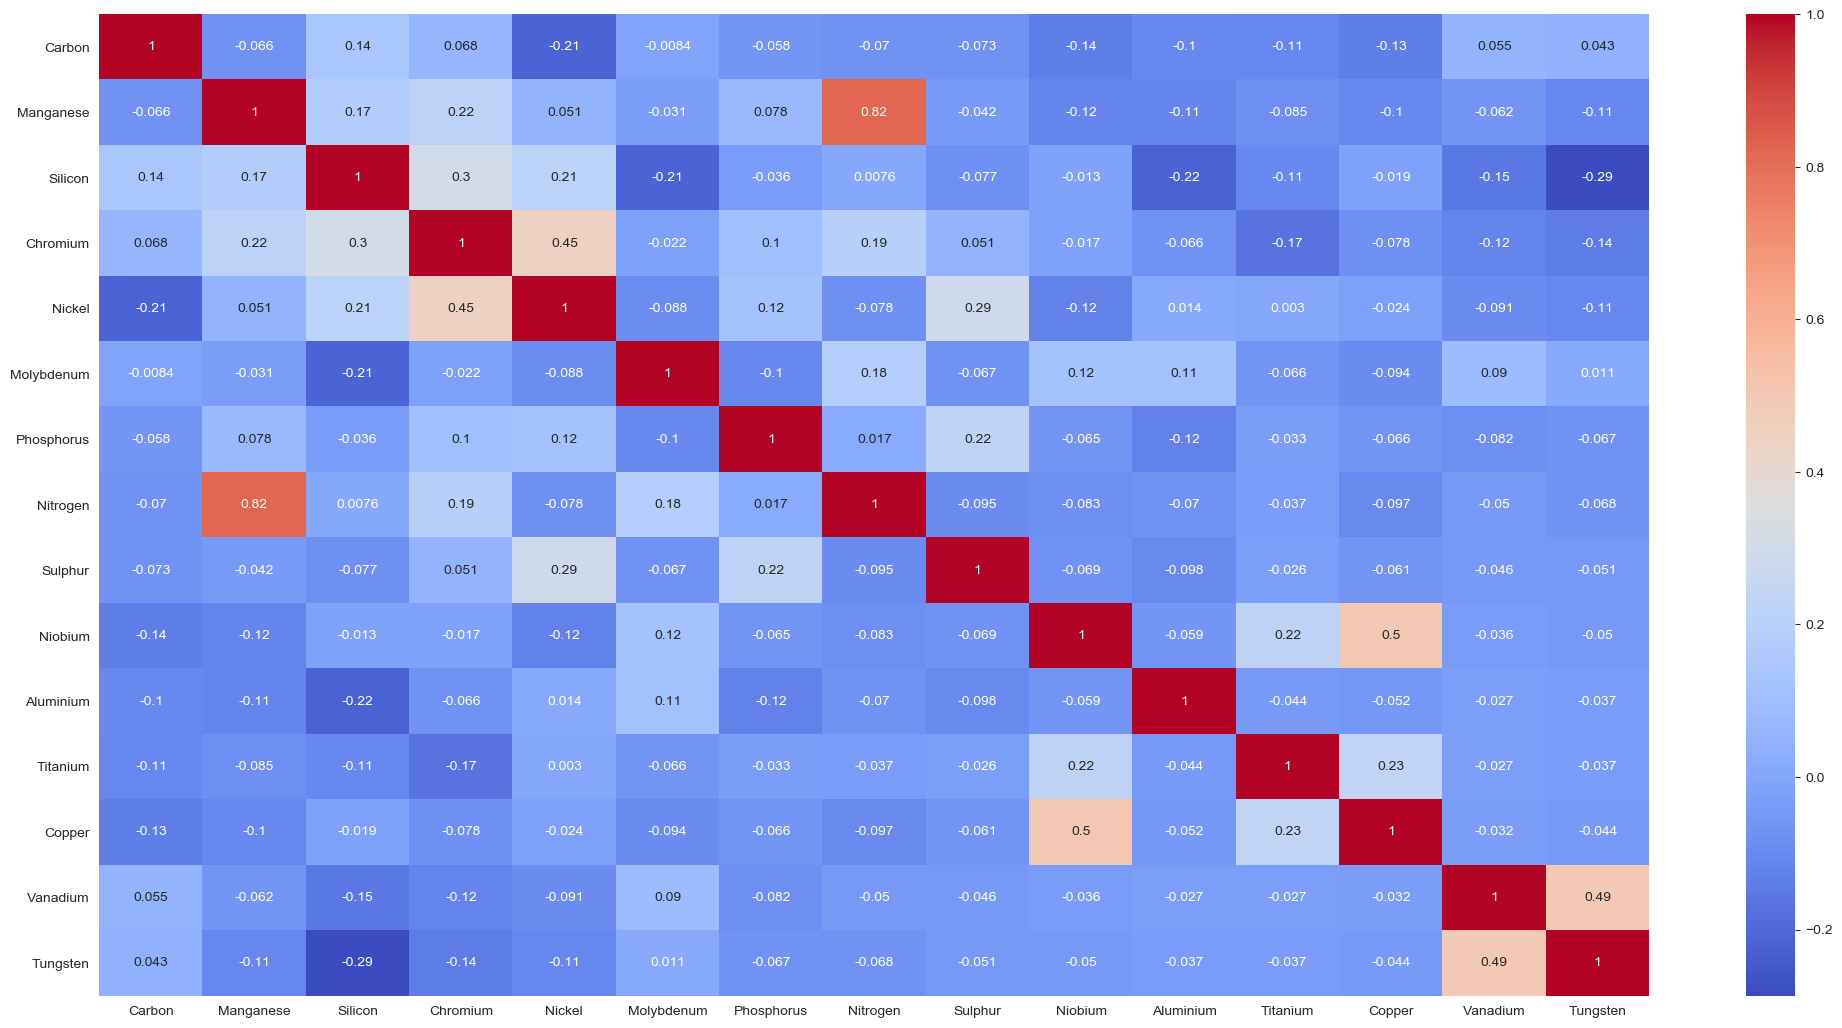

In [14]:
plt.figure(figsize=(25, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

**Prediction**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

In [24]:
X= df.drop(['Type', 'Steel'], axis=1)
y = df['Type']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
X.head(3)

,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten
0,0.15,6.50,1.0,17.0,4.5,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0
1,0.15,8.75,1.0,18.0,5.0,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0
2,0.15,2.00,1.0,17.0,7.0,0.0,0.045,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0


**Decision Tree Classifier**

In [45]:
modelTree = DecisionTreeClassifier()

In [46]:
modelTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
y_pred = modelTree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[8, 0, 0, 0],
       [0, 2, 1, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 3]], dtype=int64)

In [48]:
df_f1 = f1_score(y_test, y_pred, average='macro')
df_f1

0.9272727272727272

In [49]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.9473684210526315

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           F       1.00      0.67      0.80         3
           M       0.83      1.00      0.91         5
           P       1.00      1.00      1.00         3

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.93        19
weighted avg       0.96      0.95      0.94        19



**Random Forest Classifier**

In [51]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

In [52]:
y_pred_rf = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred_rf)

array([[8, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 4, 0],
       [0, 0, 0, 3]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           F       0.75      1.00      0.86         3
           M       1.00      0.80      0.89         5
           P       1.00      1.00      1.00         3

    accuracy                           0.95        19
   macro avg       0.94      0.95      0.94        19
weighted avg       0.96      0.95      0.95        19



In [54]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy

0.9473684210526315

In [55]:
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_f1

0.9365079365079365

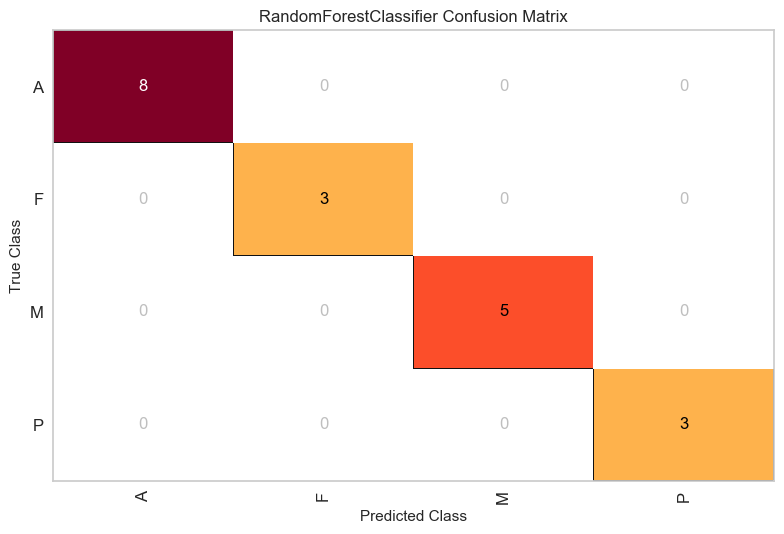

In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rf_model)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
cm.show()

In [44]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           F       1.00      1.00      1.00         3
           M       1.00      1.00      1.00         5
           P       1.00      1.00      1.00         3

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



**Random Forest Tuning**

In [56]:
rf = RandomForestClassifier()

In [57]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [58]:
from sklearn.model_selection import GridSearchCV
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   22.6s finished


In [59]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_split': 4,
 'n_estimators': 300}

In [60]:
rf_tuned = RandomForestClassifier(max_depth = 7,
                                  max_features = 6,
                                  min_samples_split = 4,
                                  n_estimators = 300).fit(X_train, y_train)

In [61]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[8, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 3]], dtype=int64)

In [62]:
rf_f1_tuned = f1_score(y_test, y_pred, average='macro')
rf_f1_tuned

1.0

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           F       1.00      1.00      1.00         3
           M       1.00      1.00      1.00         5
           P       1.00      1.00      1.00         3

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



**Random Forest Scaled**

In [99]:
rf_tuned_scaled = RandomForestClassifier(max_depth = 3,
                                  max_features = 8,
                                  min_samples_split = 4,
                                  n_estimators = 100).fit(X_train, y_train)

In [101]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [102]:
y_pred = rf_tuned_scaled.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[0, 7, 1, 0],
       [0, 2, 1, 0],
       [0, 3, 3, 0],
       [0, 2, 0, 0]], dtype=int64)

In [103]:
rf_f1_tuned_scaled = f1_score(y_test, y_pred, average='macro')
rf_f1_tuned_scaled

0.19518716577540107

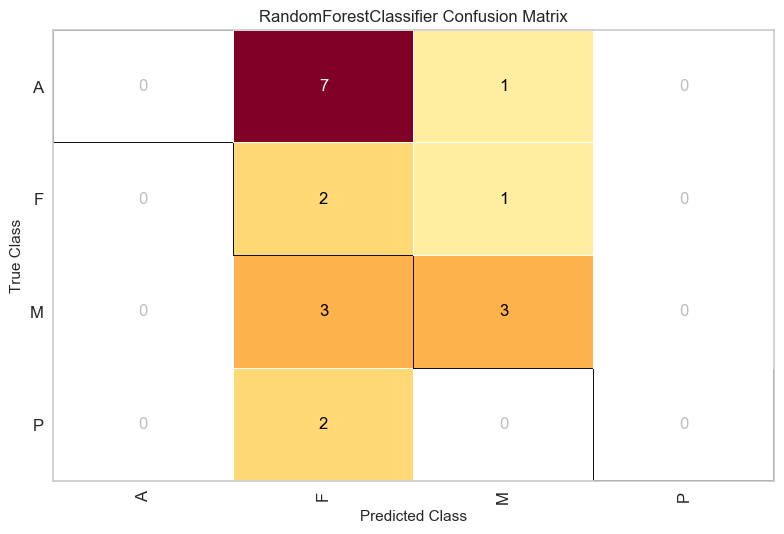

In [104]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rf_tuned_scaled)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
cm.show()

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           F       0.14      0.67      0.24         3
           M       0.60      0.50      0.55         6
           P       0.00      0.00      0.00         2

    accuracy                           0.26        19
   macro avg       0.19      0.29      0.20        19
weighted avg       0.21      0.26      0.21        19



**Important Features**

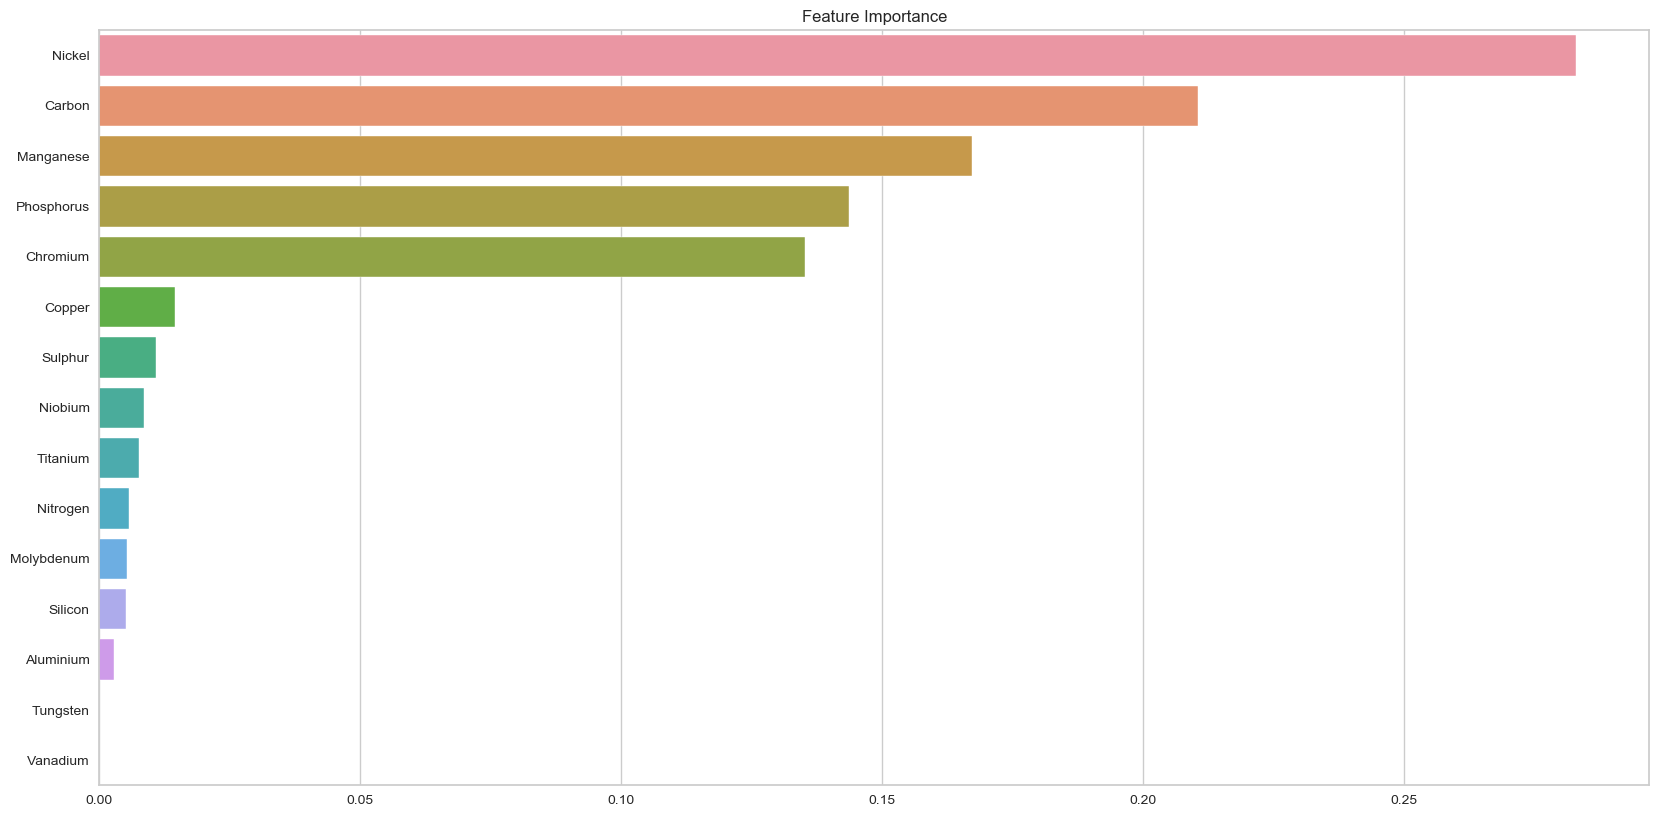

In [106]:
plt.figure(figsize=(20,10))
feature_imp = pd.Series(rf_tuned_scaled.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (62, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  14
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
 

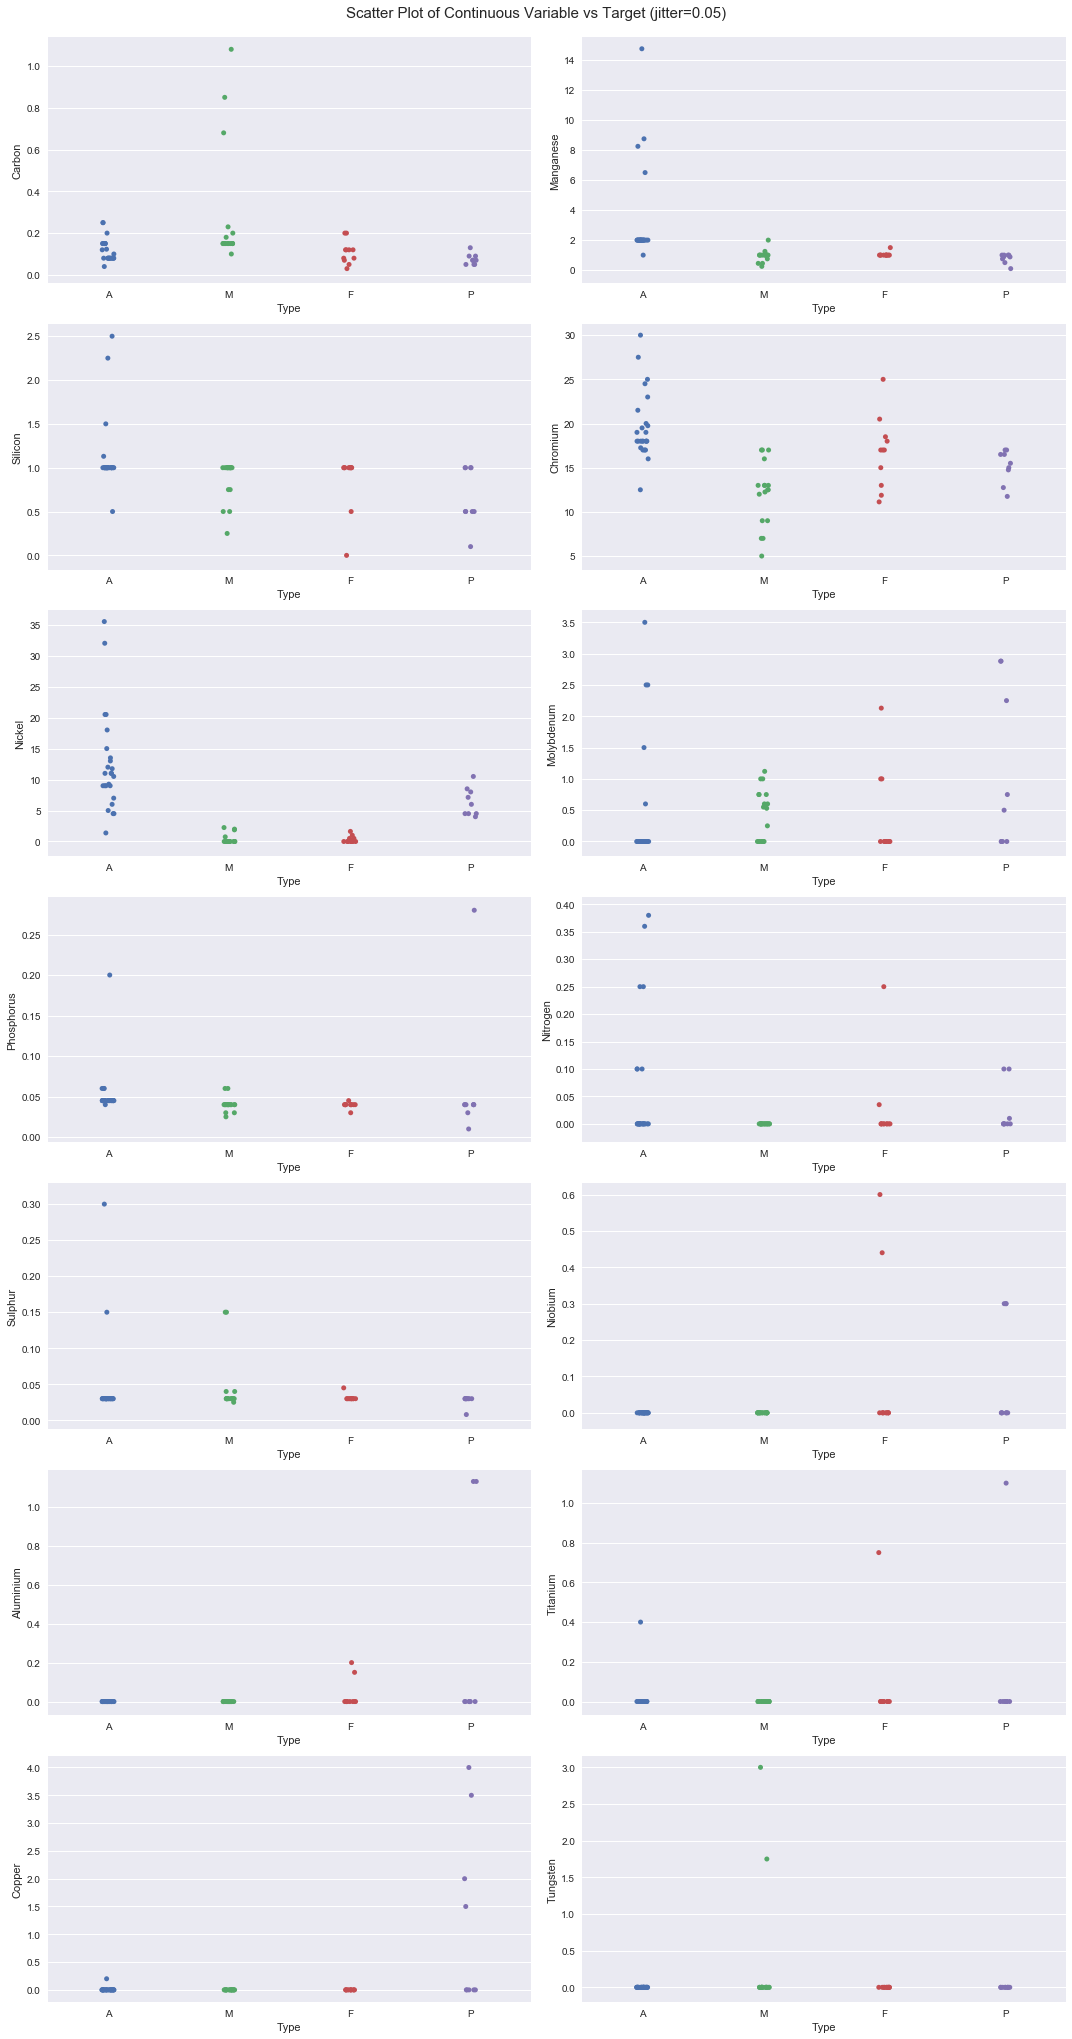

Total Number of Scatter Plots = 105


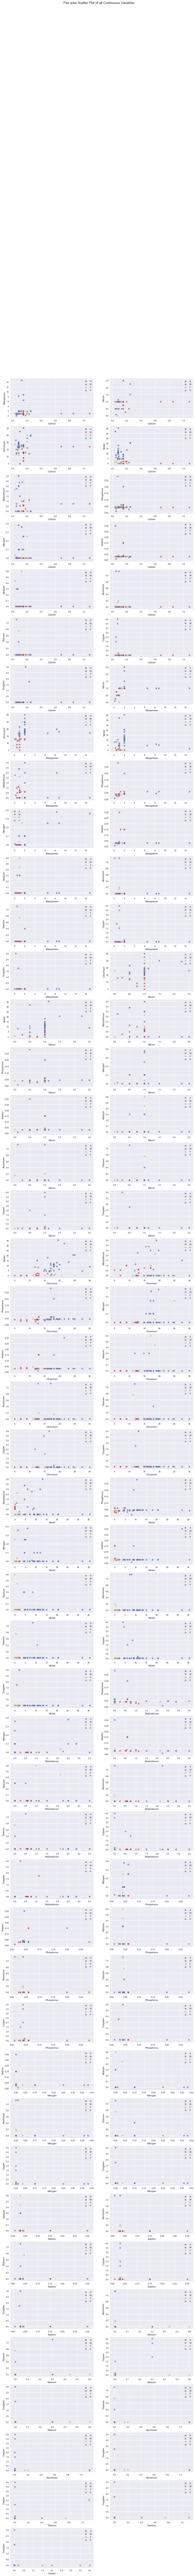

No handles with labels found to put in legend.
No handles with labels found to put in legend.


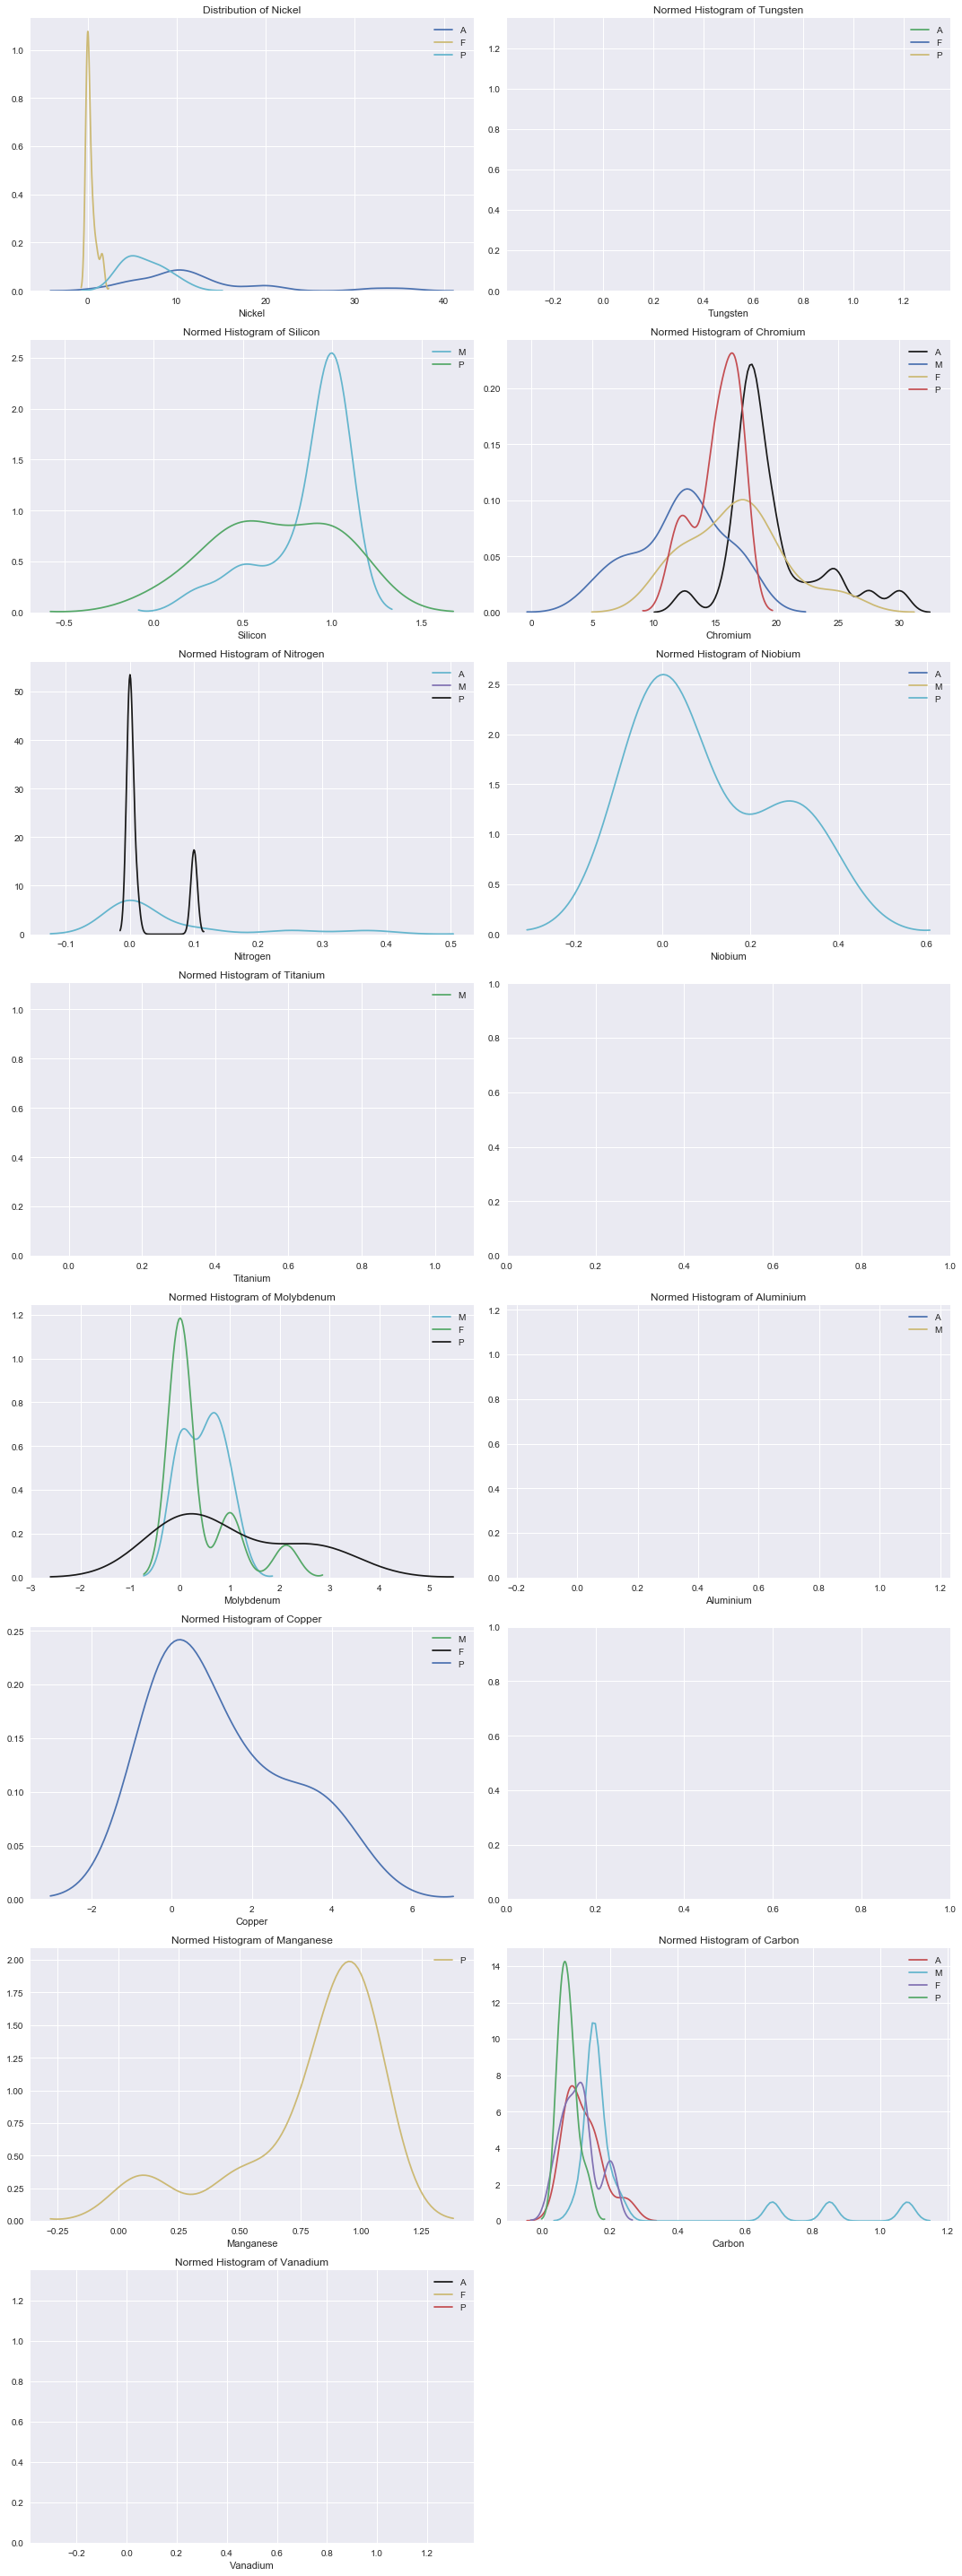

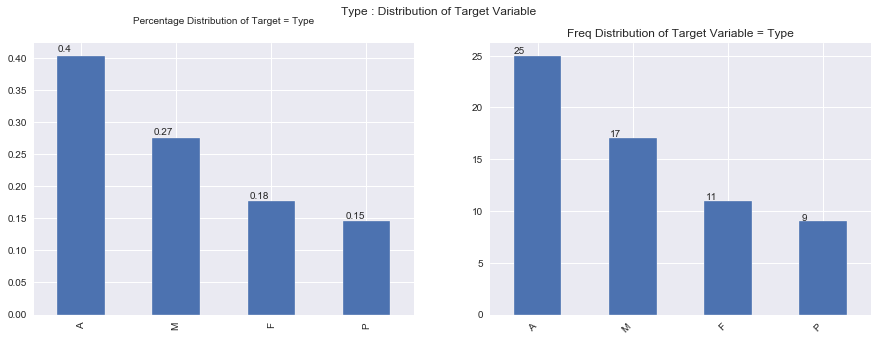

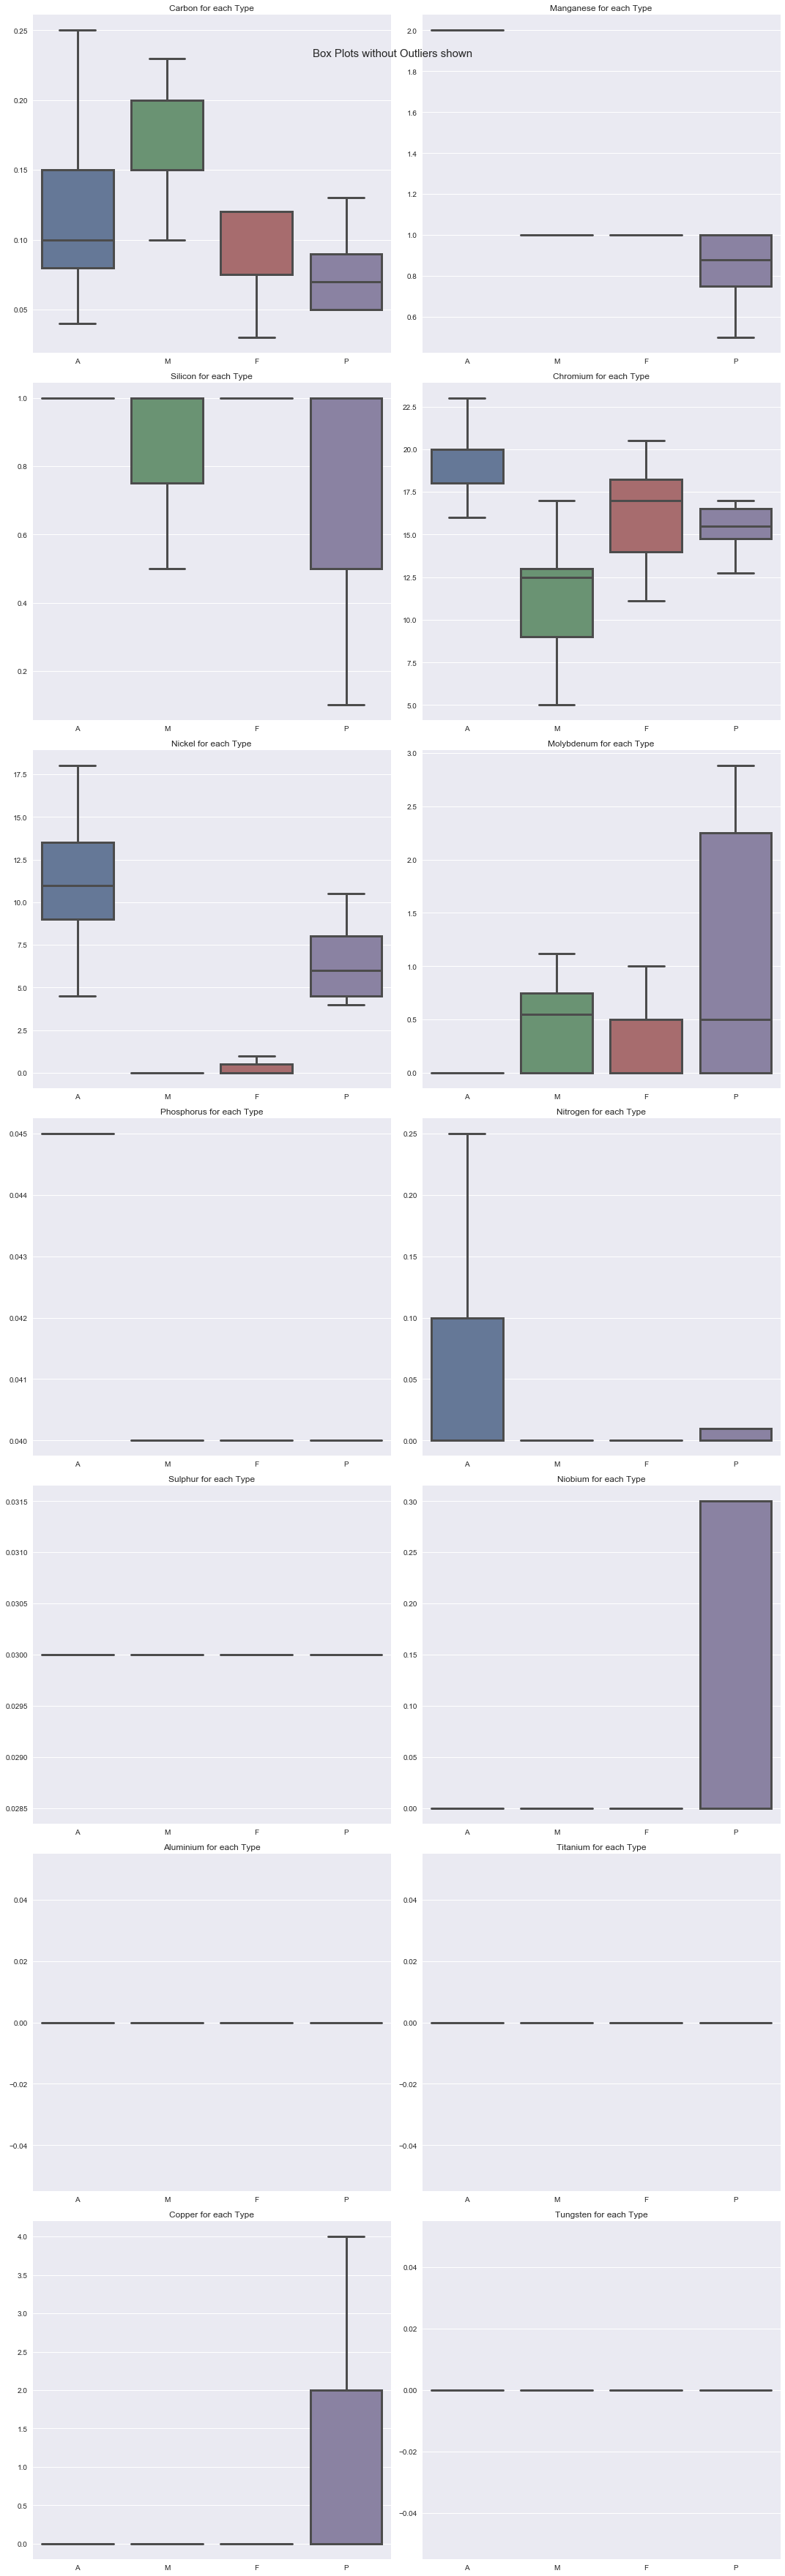

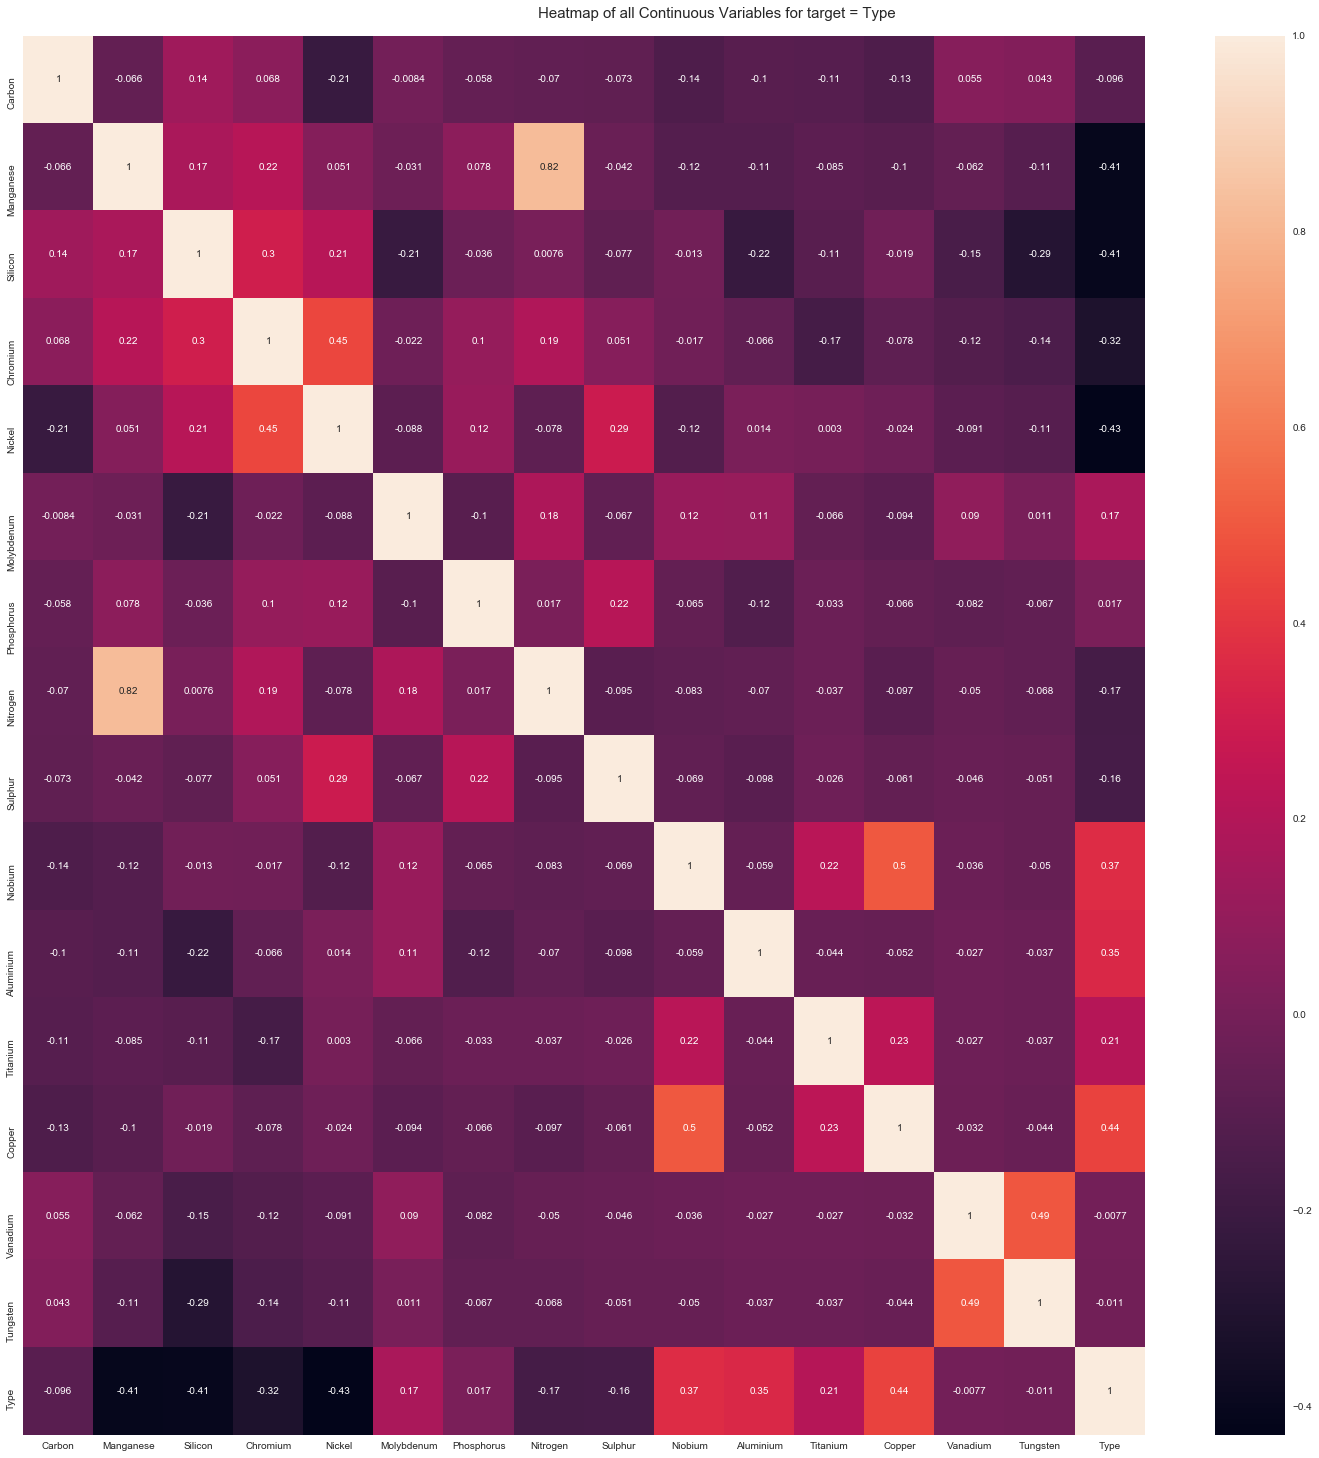

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 37.405

 ###################### VISUALIZATION Completed ########################


In [107]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="Type",
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=20000,
    max_cols_analyzed=50,
)

**XGBoost Classifier**

In [64]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred = xgb_classifier.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[8, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 5, 0],
       [1, 0, 0, 2]], dtype=int64)

In [67]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy

0.9473684210526315

In [68]:
xgb_f1 = f1_score(y_test, y_pred, average='macro')
xgb_f1

0.9352941176470588

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.89      1.00      0.94         8
           F       1.00      1.00      1.00         3
           M       1.00      1.00      1.00         5
           P       1.00      0.67      0.80         3

    accuracy                           0.95        19
   macro avg       0.97      0.92      0.94        19
weighted avg       0.95      0.95      0.94        19



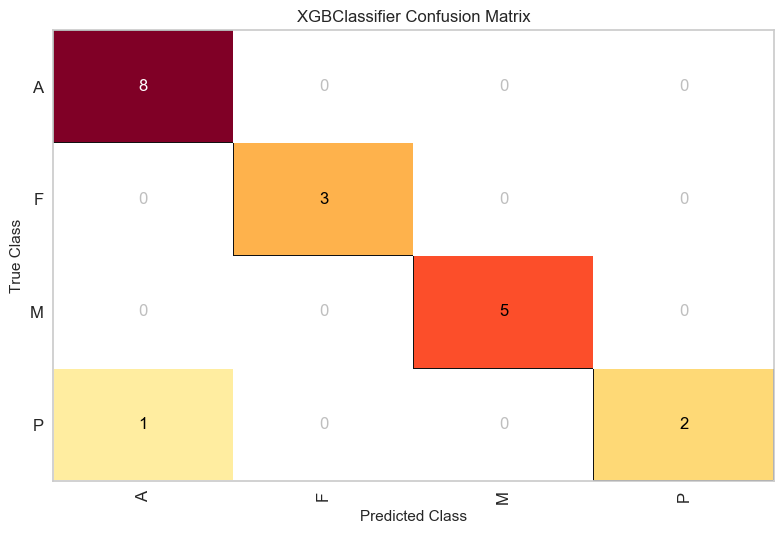

In [70]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_classifier)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
cm.show()

**Tuning XGBoost**

In [71]:
xgb = XGBClassifier()

In [72]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [74]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    9.9s finished


In [75]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.5}

In [76]:
xgb_tuned = XGBClassifier(learning_rate= 0.3,
                                max_depth= 3,
                                n_estimators= 300,
                                subsample= 0.5).fit(X_train, y_train)

In [77]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[8, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 3]], dtype=int64)

In [78]:
xgb_f1_tuned = f1_score(y_test, y_pred, average='macro')
xgb_f1_tuned

1.0

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           F       1.00      1.00      1.00         3
           M       1.00      1.00      1.00         5
           P       1.00      1.00      1.00         3

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



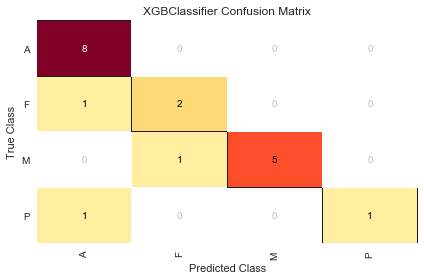

In [123]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_tuned)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
cm.show()

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.80      1.00      0.89         8
           F       0.67      0.67      0.67         3
           M       1.00      0.83      0.91         6
           P       1.00      0.50      0.67         2

    accuracy                           0.84        19
   macro avg       0.87      0.75      0.78        19
weighted avg       0.86      0.84      0.84        19



**XGBoost Scaled**

In [80]:
xgb_tuned_scaled = XGBClassifier(learning_rate= 0.3,
                                max_depth= 3,
                                n_estimators= 300,
                                subsample= 0.5).fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [127]:
y_pred = xgb_tuned_scaled.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[8, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 5, 0],
       [1, 0, 0, 1]], dtype=int64)

In [128]:
xgb_f1_tuned_scaled = f1_score(y_test, y_pred, average='macro')
xgb_f1_tuned_scaled

0.843519225872167

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.89      1.00      0.94         8
           F       0.75      1.00      0.86         3
           M       1.00      0.83      0.91         6
           P       1.00      0.50      0.67         2

    accuracy                           0.89        19
   macro avg       0.91      0.83      0.84        19
weighted avg       0.91      0.89      0.89        19



In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Naive Bayes**

In [87]:
model = MultinomialNB()
model.fit(X_train, y_train)

nb_count_acc = cross_val_score(model, X_test, y_test,cv = 8).mean()
print(nb_count_acc)

0.6666666666666666


In [92]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred) 

array([[8, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 4, 0],
       [1, 0, 0, 2]], dtype=int64)

In [93]:
nb_f1 = f1_score(y_test, y_pred, average='weighted')
nb_f1

0.8918570937146789

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.89      1.00      0.94         8
           F       0.75      1.00      0.86         3
           M       1.00      0.80      0.89         5
           P       1.00      0.67      0.80         3

    accuracy                           0.89        19
   macro avg       0.91      0.87      0.87        19
weighted avg       0.91      0.89      0.89        19



**Support Vector Machine (SVM**)

In [100]:
model = SVC()
model.fit(X_train, y_train)

svm_acc = cross_val_score(model, X_test, y_test,cv = 8).mean()
print(svm_acc)

0.6875


In [101]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred) 

array([[8, 0, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 5, 0],
       [2, 0, 1, 0]], dtype=int64)

In [102]:
svm_f1 = f1_score(y_test, y_pred, average='weighted')
svm_f1

0.6556455240665767

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.80      1.00      0.89         8
           F       1.00      0.33      0.50         3
           M       0.62      1.00      0.77         5
           P       0.00      0.00      0.00         3

    accuracy                           0.74        19
   macro avg       0.61      0.58      0.54        19
weighted avg       0.66      0.74      0.66        19



In [108]:
from sklearn.ensemble import AdaBoostClassifier

**ADA Boosting**

In [109]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)

ada_acc = cross_val_score(model, X_test, y_test,cv = 8).mean()
print(ada_acc)

0.6875


In [110]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred) 

array([[8, 0, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 3]], dtype=int64)

In [111]:
ada_f1 = f1_score(y_test, y_pred, average='weighted')
ada_f1

0.7813765182186235

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           F       0.00      0.00      0.00         3
           M       0.62      1.00      0.77         5
           P       1.00      1.00      1.00         3

    accuracy                           0.84        19
   macro avg       0.66      0.75      0.69        19
weighted avg       0.74      0.84      0.78        19



**Feature Importance**

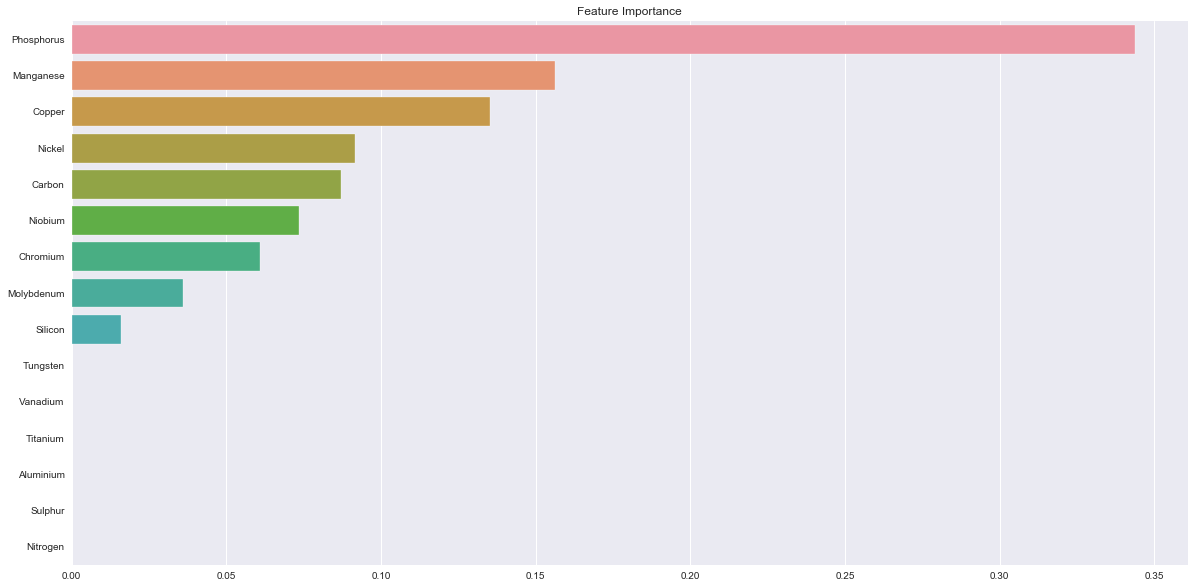

In [130]:
plt.figure(figsize = (20, 10))
feature_imp = pd.Series(xgb_tuned_scaled.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show();

In [81]:
compare = pd.DataFrame({"Model": ["XGBoost F1", "XGBoost F1 Tuned", "XGBoost F1 Tuned Scaled", "Random Forest F1",
                                  "Random Forest F1 Tuned","Random Forest F1 Tuned Scaled","Desicion Tree F1"],
                        "F1 Score": [xgb_f1, xgb_f1_tuned, xgb_f1_tuned_scaled, rf_f1, rf_f1_tuned, rf_f1_tuned_scaled,df_f1]})
compare = compare.sort_values(by="F1 Score", ascending=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
ax.set_xlim(.60, 1)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score of Different Models", size=14)

NameError: name 'xgb_f1_tuned_scaled' is not defined

In [136]:
df.sample(8)

,Steel,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten,Type
60,501B,0.15,0.45,0.75,9.0,0.0,1.00,0.030,0.000,0.03,0.00,0.0,0.0,0.0,0.0,0.0,M
10,310,0.25,2.00,1.50,25.0,20.5,0.00,0.045,0.000,0.03,0.00,0.0,0.0,0.0,0.0,0.0,A
51,436,0.12,1.00,1.00,17.0,0.0,1.00,0.040,0.000,0.03,0.60,0.0,0.0,0.0,0.0,0.0,F
2,301,0.15,2.00,1.00,17.0,7.0,0.00,0.045,0.000,0.03,0.00,0.0,0.0,0.0,0.0,0.0,A
21,410,0.15,1.00,1.00,12.5,0.0,0.00,0.040,0.000,0.03,0.00,0.0,0.0,0.0,0.0,0.0,M
13,317,0.08,2.00,1.00,19.0,13.0,3.50,0.045,0.000,0.03,0.00,0.0,0.0,0.0,0.0,0.0,A
8,308,0.08,2.00,1.00,20.0,11.0,0.00,0.045,0.000,0.03,0.00,0.0,0.0,0.0,0.0,0.0,A
53,444,0.03,1.00,1.00,18.5,1.0,2.13,0.040,0.035,0.03,0.44,0.0,0.0,0.0,0.0,0.0,F


**Hopkins Statistic**

In [8]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [9]:
df2 = df.drop(['Type', 'Steel'], axis=1)

In [10]:
df2.head(3)

,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten
0,0.15,6.50,1.0,17.0,4.5,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0
1,0.15,8.75,1.0,18.0,5.0,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0
2,0.15,2.00,1.0,17.0,7.0,0.0,0.045,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df2.shape

(62, 15)

In [12]:
hopkins(df2, 62) 

0.16115446598779293

In [13]:
hopkins(scale(df2), df2.shape[0])  

0.1439359738077262

**K-Means Clustering - not scaled**

In [14]:
k_means = KMeans(n_clusters = 2).fit(df2)

I already know that there are 4 types/clusters - it was just a trial to show similarities between the types.

In [15]:
clusters = k_means.labels_

In [16]:
df['predicted_type'] = clusters

In [17]:
df.sample(10)

,Steel,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten,Type,predicted_type
47,385,0.080,2.00,1.0,12.50,15.00,0.00,0.045,0.00,0.030,0.0,0.0,0.00,0.0,0.0,0.0,A,1
37,450,0.050,1.00,1.0,15.00,6.00,0.75,0.030,0.00,0.030,0.0,0.0,0.00,1.5,0.0,0.0,P,0
23,416,0.150,1.25,1.0,13.00,0.00,0.60,0.060,0.00,0.150,0.0,0.0,0.00,0.0,0.0,0.0,M,0
0,201,0.150,6.50,1.0,17.00,4.50,0.00,0.060,0.25,0.030,0.0,0.0,0.00,0.0,0.0,0.0,A,0
39,455,0.050,0.50,0.5,11.75,8.50,0.50,0.040,0.00,0.030,0.3,0.0,1.10,2.0,0.0,0.0,P,0
38,AM-350,0.090,0.88,0.5,16.50,4.50,2.88,0.040,0.10,0.030,0.0,0.0,0.00,0.0,0.0,0.0,P,0
20,409,0.080,1.00,1.0,11.13,0.50,0.00,0.045,0.00,0.045,0.0,0.0,0.75,0.0,0.0,0.0,F,0
41,205,0.123,14.75,1.0,17.25,1.38,0.00,0.060,0.36,0.030,0.0,0.0,0.00,0.0,0.0,0.0,A,0
42,216,0.080,8.25,1.0,19.75,6.00,2.50,0.045,0.38,0.030,0.0,0.0,0.00,0.0,0.0,0.0,A,0
18,403,0.150,1.00,0.5,12.25,0.00,0.00,0.040,0.00,0.030,0.0,0.0,0.00,0.0,0.0,0.0,M,0


**Elbow Method**

In [18]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df2))
    ssd.append(kmeans.inertia_)

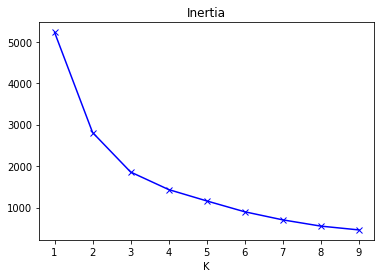

In [19]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia");

In [20]:
from yellowbrick.cluster import KElbowVisualizer

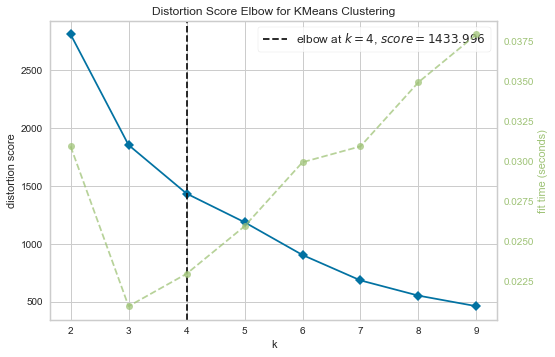

In [21]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.poof();

Elbow method tells us to use 4 clusters/types; which was expected.

**K-Means for 4 Clusters**

In [22]:
kmeans_4 = KMeans(n_clusters = 4).fit(df2)

In [23]:
labels_4 = kmeans_4.labels_

In [24]:
df2['cluster_4'] = labels_4

In [25]:
df2.head(3)

,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten,cluster_4
0,0.15,6.50,1.0,17.0,4.5,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.15,8.75,1.0,18.0,5.0,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.15,2.00,1.0,17.0,7.0,0.0,0.045,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
df2['cluster_4'].value_counts()

2    21
0    20
3    17
1     4
Name: cluster_4, dtype: int64

In [29]:
tab = pd.crosstab(df2['cluster_4'], df["Type"])
tab

Type,A,F,M,P
cluster_4,,,,
0,16,0,0,4
1,4,0,0,0
2,5,7,4,5
3,0,4,13,0


**Silhouette Score**

In [30]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [32]:
print(f'Silhouette Score(n=2): {silhouette_score(df2, clusters)}')

Silhouette Score(n=2): 0.44243921339717235


In [34]:
print(f'Silhouette Score(n=4): {silhouette_score(df2, labels_4)}')

Silhouette Score(n=4): 0.3780086342339762


In [62]:
print(f'Silhouette Score(n=5): {silhouette_score(df3, clusters_s)}')

Silhouette Score(n=5): 0.11004954248762146


**K-Means Clustering - Scaled**

In [37]:
df.head(3)

,Steel,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten,Type,predicted_type
0,201,0.15,6.50,1.0,17.0,4.5,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0,A,0
1,202,0.15,8.75,1.0,18.0,5.0,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0,A,0
2,301,0.15,2.00,1.0,17.0,7.0,0.0,0.045,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0,A,0


In [38]:
df3 = df.drop(['Steel', 'Type', 'predicted_type'], axis=1)

In [39]:
df3.head(3)

,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten
0,0.15,6.50,1.0,17.0,4.5,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0
1,0.15,8.75,1.0,18.0,5.0,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0
2,0.15,2.00,1.0,17.0,7.0,0.0,0.045,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df3.shape

(62, 15)

In [41]:
hopkins(scale(df3), df3.shape[0])  

0.1396109027644586

In [42]:
k_means_s = KMeans(n_clusters = 4).fit(scale(df3))

In [43]:
clusters_s = k_means_s.labels_

In [44]:
tab = pd.crosstab(clusters_s, df["Type"])  # scaled results
tab

Type,A,F,M,P
row_0,,,,
0,2,8,17,5
1,19,1,0,1
2,4,0,0,0
3,0,2,0,3


In [58]:
k_means_s = KMeans(n_clusters = 5).fit(scale(df3))

In [59]:
clusters_s = k_means_s.labels_

In [60]:
tab = pd.crosstab(clusters_s, df["Type"])  # scaled results
tab

Type,A,F,M,P
row_0,,,,
0,0,2,0,3
1,19,2,0,2
2,0,7,17,3
3,4,0,0,0
4,2,0,0,1


In [61]:
# possible mistake here   print(f'Silhouette Score(n=5): {silhouette_score(df3, clusters_s)}')

Silhouette Score(n=5): 0.11004954248762146


In [45]:
tab = pd.crosstab(df2['cluster_4'], df["Type"]) # unscaled results
tab

Type,A,F,M,P
cluster_4,,,,
0,16,0,0,4
1,4,0,0,0
2,5,7,4,5
3,0,4,13,0


**Find the Reason/Source of Errors in Clustering**

In [ ]:
D_miss = df[(clusters == 0) & (df["party"] == "D")]

**Hierarchical Clustering**

In [54]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, linkage

In [50]:
df4 = df.drop(['Type', 'Steel', 'predicted_type'], axis=1)

In [51]:
df4.head(3)

,Carbon,Manganese,Silicon,Chromium,Nickel,Molybdenum,Phosphorus,Nitrogen,Sulphur,Niobium,Aluminium,Titanium,Copper,Vanadium,Tungsten
0,0.15,6.50,1.0,17.0,4.5,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0
1,0.15,8.75,1.0,18.0,5.0,0.0,0.060,0.25,0.03,0.0,0.0,0.0,0.0,0.0,0.0
2,0.15,2.00,1.0,17.0,7.0,0.0,0.045,0.00,0.03,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
hc_complete = linkage(df2, 'complete')
hc_ward = linkage(df2, 'ward')

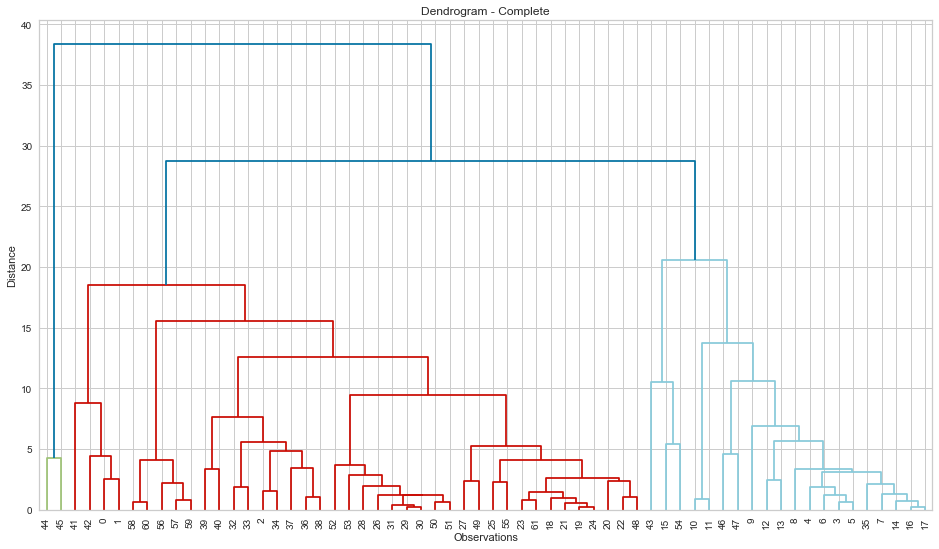

In [55]:
plt.figure(figsize = (16,9))
plt.title('Dendrogram - Complete')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_font_size = 10);

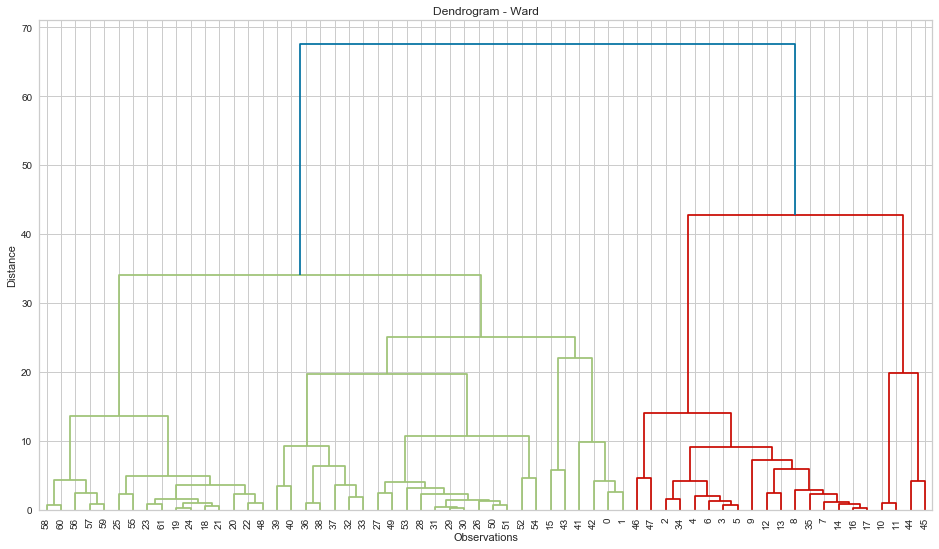

In [56]:
plt.figure(figsize = (16,9))
plt.title('Dendrogram - Ward')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_font_size = 10);

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters = 3, linkage = 'ward') # linkage default ward
model.fit_predict(X)